## ライブラリのインポート

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE

## Word2Vecモデルの学習

In [2]:
# Word2Vecモデルの学習
model = Word2Vec(
    sentences=LineSentence("../data/processed/corpus-true.txt"),  # 学習データ
    vector_size=100,  # ベクトルの次元数
    window=5,  # コンテキストウィンドウのサイズ
    min_count=2,  # 最小出現回数（これ以下の単語は無視）
    sg=1,  # 0: CBOW, 1: Skip-gram
    epochs=100,  # エポック数
    negative=5,  # ネガティブサンプリング数（Skip-gram使用時）
    alpha=0.025,  # 初期学習率
    min_alpha=0.0001,  # 最小学習率
    seed=42,  # 再現性のため
)

print(f"語彙数: {len(model.wv):,}語")
print(f"ベクトルの次元数: {model.wv.vector_size}")
print("学習完了")

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


語彙数: 226語
ベクトルの次元数: 100
学習完了


## モデルの保存

In [3]:
# モデルの保存
model.save("../models/word2vec_true_model.bin")
print("モデルを保存しました: ../models/word2vec_true_model.bin")

# 単語ベクトルのみを保存（より軽量）
model.wv.save("../models/word2vec_true_vectors.kv")
print("単語ベクトルを保存しました: ../models/word2vec_true_vectors.kv")

モデルを保存しました: ../models/word2vec_true_model.bin
単語ベクトルを保存しました: ../models/word2vec_true_vectors.kv


## 単語ベクトルの確認

In [4]:
# 単語ベクトルの確認
test_words = ["開発", "システム", "AWS", "React", "Python", "設計", "テスト"]

print("単語ベクトルの確認:")
for word in test_words:
    if word in model.wv:
        vector = model.wv[word]
        print(f"\n単語: {word}")
        print(f"  ベクトル (最初の10次元): {vector[:10]}")
        print(f"  ベクトルの形状: {vector.shape}")
    else:
        print(f"\n単語 '{word}' は語彙に含まれていません")

単語ベクトルの確認:

単語: 開発
  ベクトル (最初の10次元): [-0.02131323  0.00417448 -0.12399731 -0.11740073 -0.23430659  0.20607911
 -0.4114189   0.1027917  -0.21095319 -0.10137092]
  ベクトルの形状: (100,)

単語: システム
  ベクトル (最初の10次元): [ 0.15107222 -0.1832103  -0.28090066  0.33750105 -0.5735387  -0.14686398
 -0.18033922 -0.12850186 -0.67854744 -0.11906635]
  ベクトルの形状: (100,)

単語: AWS
  ベクトル (最初の10次元): [-0.156344    0.09622845 -0.37787357  0.13724253 -0.12412088 -0.04237739
 -0.5418025  -0.12667859 -0.5095024   0.18406911]
  ベクトルの形状: (100,)

単語: React
  ベクトル (最初の10次元): [-0.1508993  -0.14487219  0.03804806 -0.30674216 -0.13391271  0.14443858
 -0.64842725  0.04466182 -0.35811156  0.33950767]
  ベクトルの形状: (100,)

単語: Python
  ベクトル (最初の10次元): [-0.2000583  -0.01814875  0.09131341 -0.3348502  -0.10879502  0.6884063
 -0.19557762 -0.09515581 -0.10175032 -0.33319986]
  ベクトルの形状: (100,)

単語: 設計
  ベクトル (最初の10次元): [ 0.17324942 -0.3293307   0.22109772  0.03687227  0.3915996   0.17440858
 -0.1299997   0.38997886 -0.13355985 -0.149247

## 類似単語の検索

In [5]:
# 類似単語の検索
test_words = ["AWS", "React", "リーダー", "開発", "テスト"]

for test_word in test_words:
    if test_word in model.wv:
        similar_words = model.wv.most_similar(test_word, topn=10)
        print(f"\n'{test_word}' に類似する単語:")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    else:
        print(f"\n単語 '{test_word}' は語彙に含まれていません")


'AWS' に類似する単語:
  Linux: 0.5191
  Git: 0.5104
  Kubernetes: 0.4781
  MySQL: 0.4756
  Agile: 0.4753
  MongoDB: 0.4721
  Scrum: 0.4709
  GCP: 0.4663
  主導: 0.4641
  PostgreSQL: 0.4616

'React' に類似する単語:
  Vue: 0.5593
  Git: 0.5456
  Azure: 0.5374
  Scrum: 0.5321
  MongoDB: 0.5258
  PostgreSQL: 0.5244
  Agile: 0.5134
  GCP: 0.5105
  Kubernetes: 0.5102
  MySQL: 0.5078

'リーダー' に類似する単語:
  テスター: 0.7231
  SE: 0.6085
  PM: 0.6008
  SWE: 0.5984
  システムエンジニア: 0.5889
  PG: 0.5504
  インフラエンジニア: 0.5386
  デザイナー: 0.5374
  プログラマー: 0.5363
  エンジニア: 0.5009

'開発' に類似する単語:
  レビュー: 0.4586
  要件定義: 0.4474
  動画配信サービス: 0.4308
  教育: 0.4175
  データ分析: 0.4067
  基盤: 0.4003
  業務効率化: 0.4001
  リニューアル: 0.3912
  アプリ: 0.3851
  ECサイト: 0.3819

'テスト' に類似する単語:
  要件定義: 0.5240
  UX: 0.5024
  UI: 0.4822
  データ分析: 0.4618
  リファクタリング: 0.4546
  自動: 0.4203
  金融: 0.4079
  保守: 0.3923
  基盤: 0.3914
  プロジェクト: 0.3893


## 単語間の類似度計算

In [6]:
# 単語間の類似度を計算
word_pairs = [
    ("AWS", "GCP"),
    ("React", "Vue"),
    ("開発", "構築"),
    ("設計", "実装"),
    ("プログラミング", "開発"),
    ("テスト", "デバッグ"),
]

print("単語間の類似度:")
for word1, word2 in word_pairs:
    if word1 in model.wv and word2 in model.wv:
        similarity = model.wv.similarity(word1, word2)
        print(f"  {word1} - {word2}: {similarity:.4f}")
    else:
        missing = []
        if word1 not in model.wv:
            missing.append(word1)
        if word2 not in model.wv:
            missing.append(word2)
        print(f"  {word1} - {word2}: 語彙に含まれていない単語: {', '.join(missing)}")

単語間の類似度:
  AWS - GCP: 0.4663
  React - Vue: 0.5593
  開発 - 構築: 0.3410
  設計 - 実装: 0.4619
  プログラミング - 開発: 0.2171
  テスト - デバッグ: 0.0904


## 単語ベクトルをCSVに保存

In [7]:
# 全単語のベクトルをDataFrameに変換して保存
word_vectors_df = pd.DataFrame(
    [model.wv[word] for word in model.wv.index_to_key], index=model.wv.index_to_key
)

# CSVに保存
word_vectors_df.to_csv("../outputs/word_vectors_true.csv")
print("単語ベクトルをCSVに保存しました: ../outputs/word_vectors_true.csv")
print(f"形状: {word_vectors_df.shape}")
print("\n最初の5単語:")
print(word_vectors_df.head())

単語ベクトルをCSVに保存しました: ../outputs/word_vectors_true.csv
形状: (226, 100)

最初の5単語:
              0         1         2         3         4         5         6   \
開発     -0.021313  0.004174 -0.123997 -0.117401 -0.234307  0.206079 -0.411419   
構築     -0.130722  0.068828 -0.177905 -0.161097 -0.258075  0.249977 -0.082395   
設計      0.173249 -0.329331  0.221098  0.036872  0.391600  0.174409 -0.130000   
プロジェクト -0.062702 -0.203811 -0.138352  0.269909  0.118114  0.104851 -0.363558   
テスト     0.330985  0.195470  0.057480  0.049507  0.256820  0.247499 -0.049950   

              7         8         9   ...        90        91        92  \
開発      0.102792 -0.210953 -0.101371  ... -0.121810 -0.003565 -0.080979   
構築     -0.118711 -0.279990 -0.525087  ...  0.240194  0.071108 -0.206603   
設計      0.389979 -0.133560 -0.149248  ... -0.105582 -0.038590 -0.082441   
プロジェクト  0.134861 -0.099633 -0.263140  ... -0.520700 -0.031863 -0.236113   
テスト     0.020765 -0.044886 -0.052851  ... -0.295959  0.214789  0.027

## t-SNEによる単語ベクトルの可視化

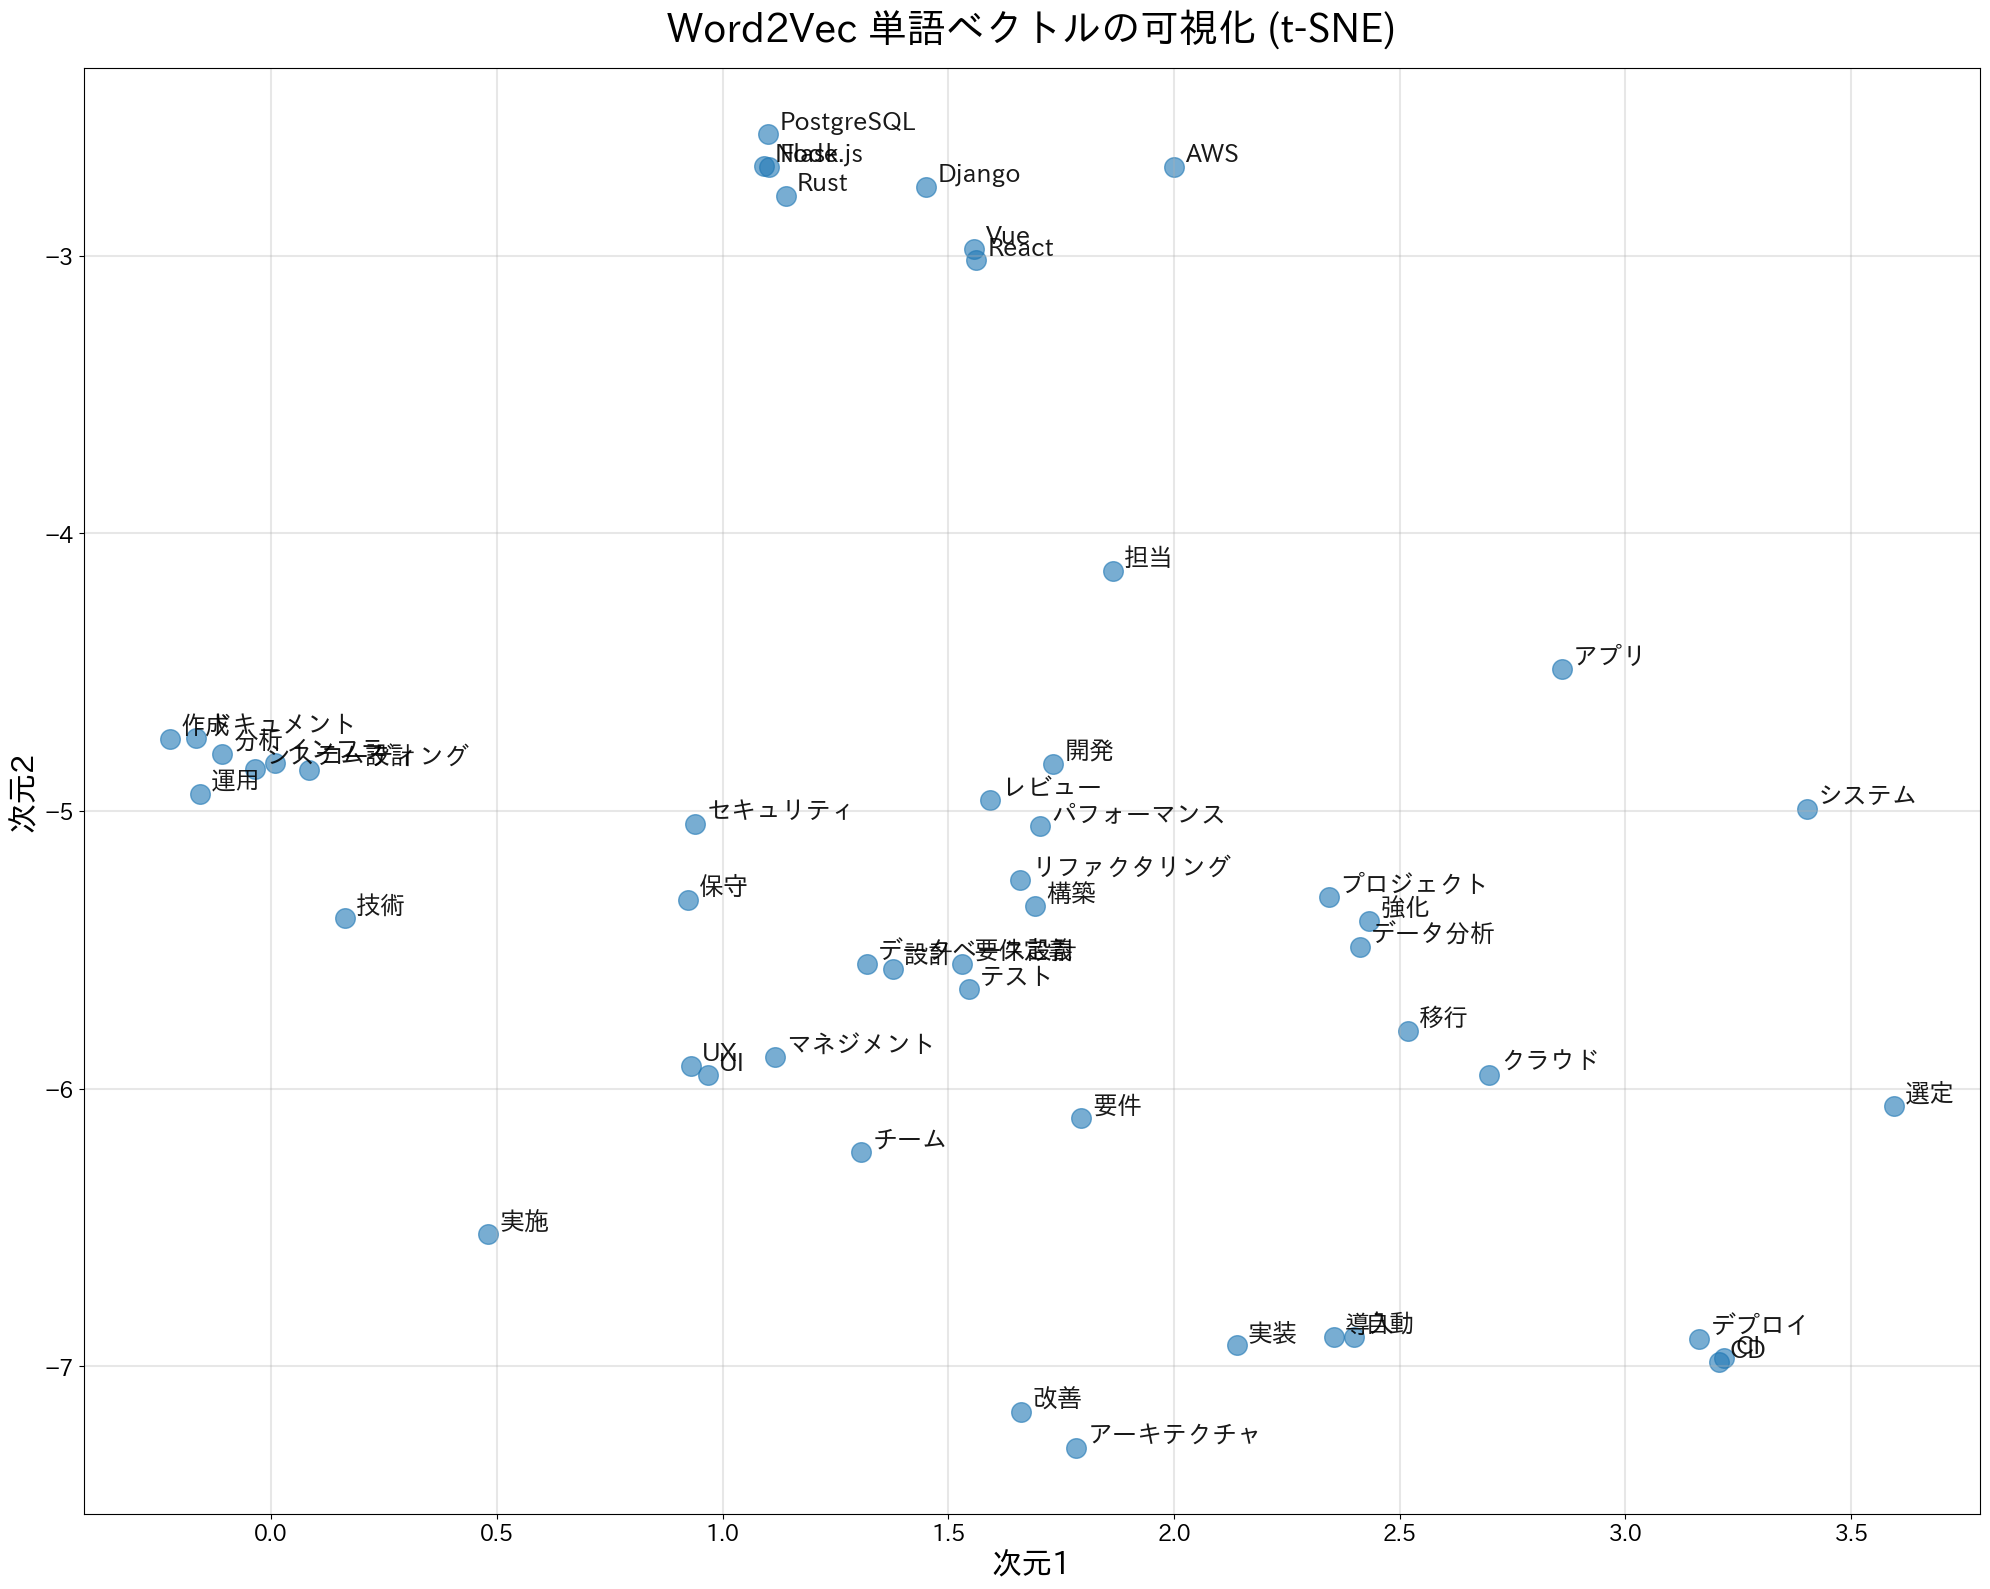

可視化した単語数: 50


In [8]:
# 全単語の頻度を集計
corpus = LineSentence("../data/processed/corpus-true.txt")
word_freq = Counter()
for doc in corpus:
    word_freq.update(doc)

# 頻出単語上位50件を可視化
top_words = [word for word, _ in word_freq.most_common(50)]
top_words_in_model = [word for word in top_words if word in model.wv]

# ベクトルを取得
vectors = np.array([model.wv[word] for word in top_words_in_model])

# t-SNEで2次元に圧縮
tsne = TSNE(
    n_components=2, random_state=42, perplexity=min(30, len(top_words_in_model) - 1)
)
vectors_2d = tsne.fit_transform(vectors)

# フォント設定
plt.rcParams["font.family"] = "IPAexGothic"

# 可視化
plt.figure(figsize=(20, 16))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.6, s=200)

# 単語ラベルを追加
for i, word in enumerate(top_words_in_model):
    plt.annotate(
        word,
        xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
        xytext=(8, 4),
        textcoords="offset points",
        fontsize=18,
        fontweight="bold",
        alpha=0.9,
    )

plt.title(
    "Word2Vec 単語ベクトルの可視化 (t-SNE)", fontsize=28, fontweight="bold", pad=20
)
plt.xlabel("次元1", fontsize=22, fontweight="bold")
plt.ylabel("次元2", fontsize=22, fontweight="bold")
plt.tick_params(labelsize=16)
plt.grid(True, alpha=0.3, linewidth=1.5)
plt.tight_layout()
plt.show()

print(f"可視化した単語数: {len(top_words_in_model)}")